# K means

## Import datasets

In [74]:
import pandas as pd
X = pd.read_csv("sample1.csv", header=None)

In [75]:
X.head()

,0,1
0,2.686260,-0.296126
1,0.636612,0.055447
2,-4.803475,0.248127
3,3.217861,-1.140347
4,-9.958776,-6.649059


In [76]:
X.shape #n_samples=500, n_features=2

(500, 2)

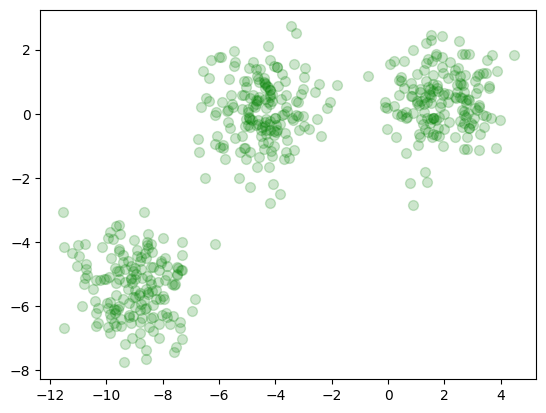

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X[0],X[1],c='green',marker='o',s=50, alpha=.2)
plt.show()

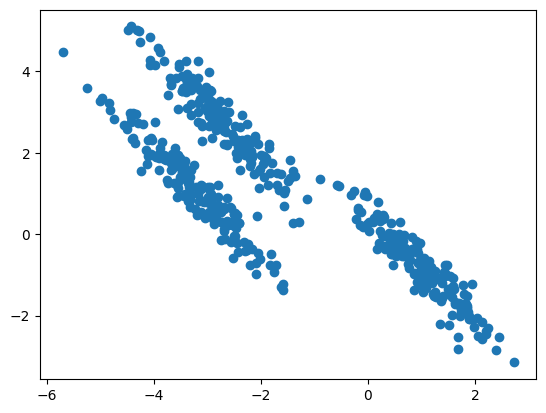

In [78]:
import numpy as np

# Anisotropicly distributed data
transformation = [[0.6, -0.6], [-0.4, 0.8]]
# transformation=PDP^-1 D=diag(1.2,0.2) and P=[[0.07107, -0.83205], [-0.707107, -0.5547]]
# the transformation expands in the direction [0.710,-0.707] and shrinks in the direction  [-0.832, -0.5547]

X3 = pd.DataFrame(np.dot(X, transformation))


plt.scatter(X3[0], X3[1])
plt.show()

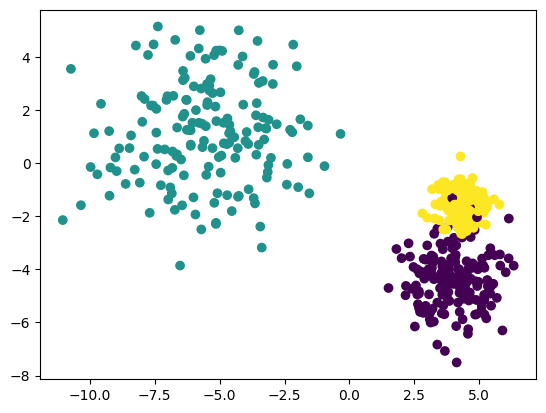

In [79]:
import pandas as pd
X2 = pd.read_csv("sample2.csv", header=None)

plt.scatter(X2[0], X2[1],c=X2[2])
plt.show()

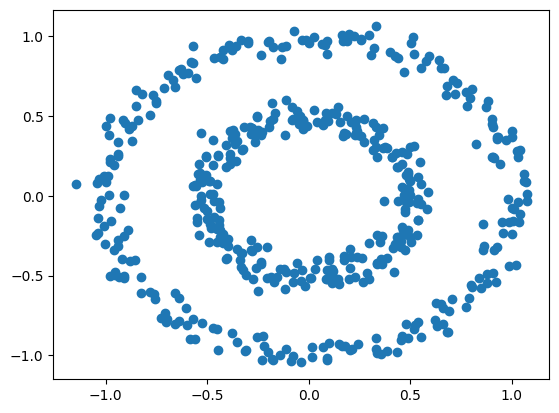

In [80]:
import pandas as pd
X4 = pd.read_csv("sample4.csv", header=None)

plt.scatter(X4[0], X4[1])
plt.show()

## K-means

$$
\min_{\mu_j \in C} \sum_{i=0}^{n}(||x_i - \mu_j||^2)
$$

In [81]:
# to get the intuition, let's play with an interactive version of k-means

In [82]:

from sklearn.cluster import KMeans

#min-max scaler: transforms features by scaling each feature to a given range.
km = KMeans(n_clusters=3, 
            init='random',  #init=’k-means++’ 
            n_init=10, 
            max_iter=300, 
            tol=1e-04, 
            random_state=0) #init=’k-means++’ see notes below

#n_clusters : The number of clusters to form as well as the number of centroids to generate.
#n_init : Number of time the k-means algorithm will be run with different centroid seeds. 
#The final results will be the best output of n_init consecutive runs in terms of inertia (Sum of squared distances of samples to their closest cluster center.)
#max_iter : Maximum number of iterations of the k-means algorithm for a single run.
#tol: Relative tolerance with regards to inertia to declare convergence. 

km.fit(X) #Compute k-means clustering.
y_km = km.predict(X) #Predict the closest cluster each sample in X belongs to.

init : {‘k-means++’, ‘random’ or an ndarray}

    Method for initialization, defaults to ‘k-means++’:

    ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.

    ‘random’: choose k observations (rows) at random from data for the initial centroids.

    If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.
    
“k-means++: The advantages of careful seeding” Arthur, David, and Sergei Vassilvitskii, Proceedings of the eighteenth annual ACM-SIAM symposium on Discrete algorithms, Society for Industrial and Applied Mathematics (2007)

In [83]:
y_km

array([0, 0, 1, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 2, 1, 0, 1, 0, 0, 1, 0, 1,
       2, 1, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 1, 1, 2,
       0, 0, 1, 1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 0, 0, 0, 2, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 2, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 0, 0, 1, 2, 1,
       0, 1, 0, 2, 2, 0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 1, 0, 1, 2, 2,
       0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 0, 1, 0, 0, 2,
       2, 2, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 2, 1, 2, 2,
       1, 1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 1, 2, 1, 1, 0, 0, 2, 2, 2, 2, 1,
       1, 1, 2, 0, 1, 1, 2, 1, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0,
       1, 2, 0, 2, 0, 0, 0, 1, 1, 2, 1, 0, 2, 2, 1, 0, 2, 2, 1, 0, 2, 0,
       1, 0, 0, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 0, 1, 0,
       1, 2, 2, 1, 1, 2, 0, 0, 2, 2, 1, 0, 2, 2, 2,

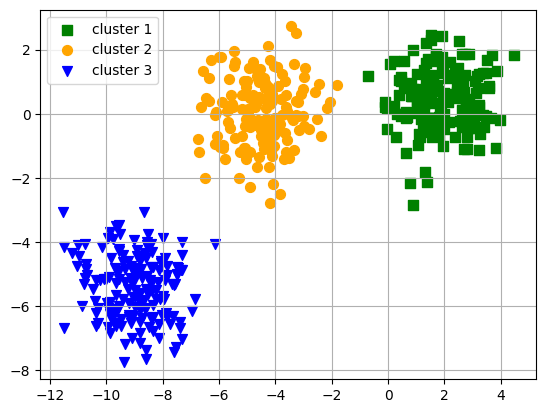

In [84]:
plt.scatter(X.iloc[y_km==0,0],X.iloc[y_km==0,1],s=50,c='green',marker='s',label='cluster 1')
plt.scatter(X.iloc[y_km==1,0],X.iloc[y_km==1,1],s=50,c='orange',marker='o',label='cluster 2')
plt.scatter(X.iloc[y_km==2,0],X.iloc[y_km==2,1],s=50,c='blue',marker='v',label='cluster 3')
plt.legend()
plt.grid()
plt.show()

In [85]:
km.cluster_centers_ #Coordinates of cluster centroids. 

array([[ 1.91000503,  0.41483073],
       [-4.49030612,  0.0669614 ],
       [-9.00048452, -5.40690883]])

In [86]:
km.cluster_centers_[:,0] #only x values

array([ 1.91000503, -4.49030612, -9.00048452])

In [87]:
#y_km==0

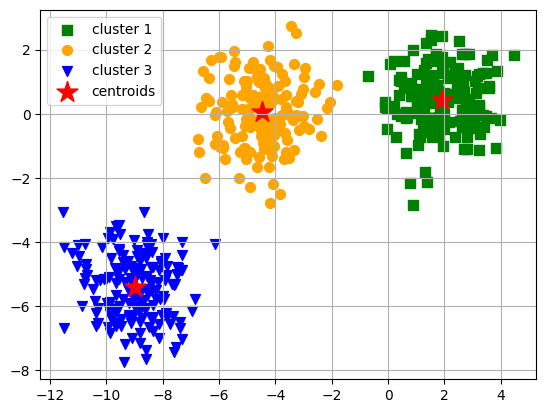

In [88]:
plt.scatter(X.iloc[y_km==0,0],X.iloc[y_km==0,1],s=50,c='green',marker='s',label='cluster 1')
plt.scatter(X.iloc[y_km==1,0],X.iloc[y_km==1,1],s=50,c='orange',marker='o',label='cluster 2')
plt.scatter(X.iloc[y_km==2,0],X.iloc[y_km==2,1],s=50,c='blue',marker='v',label='cluster 3')
plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s=250,c='red',
            marker='*',
            label='centroids')
plt.legend()
plt.grid()
plt.show()

In [89]:
# This clustering is ''hard''. Soft (e.g. fuzzy) not implemented in sklearn

# Clustering Quality

In [90]:
print("Distortion: %.2f" % km.inertia_) #Sum of squared distances of samples to their closest cluster center.

Distortion: 983.18


The Elbow method finds the optimal value for k (#clusters). HOW TO Determine optimal k.

We can use the scree plot:
    
    1 - values for K on the horizontal axis
    
    2 - the distortion on the Y axis (the values calculated with the cost function).

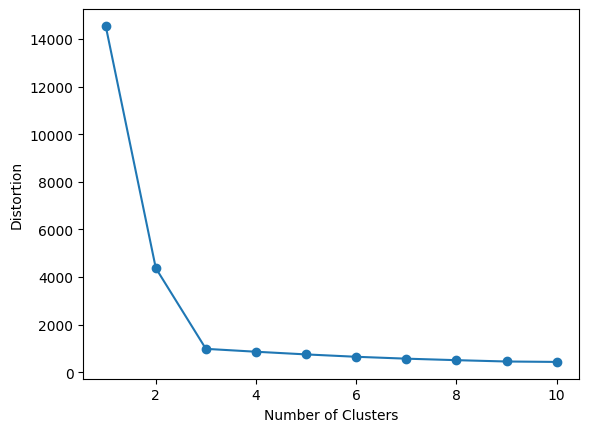

In [91]:
distorsions = [] #empty list

for i in range(1,11):
    km = KMeans(n_clusters=i, init ='random',n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    distorsions.append(km.inertia_)
    
plt.plot(range(1,11), distorsions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

When K increases, the centroids are closer to the clusters centroids.

The improvements will decline, at some point rapidly, creating the elbow shape.

That point is the optimal value for K. In the image above, K=3.

# Selecting the number of clusters with silhouette analysis on KMeans clustering


Distortion: 4374.47


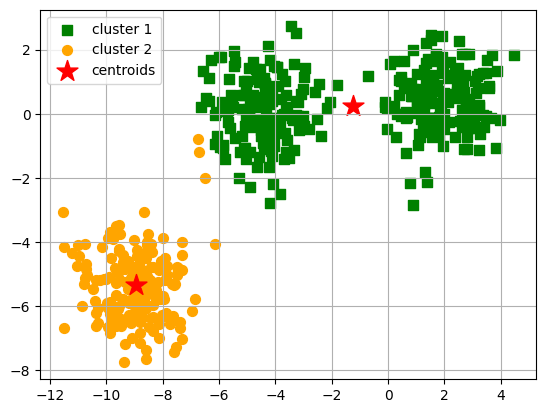

In [92]:
#let's see a bad clustering in two dimensions
km = KMeans(n_clusters=2, init ='k-means++',n_init=10,max_iter=300,random_state=0)
y_km = km.fit_predict(X)

print("Distortion: %.2f" % km.inertia_)

plt.scatter(X.iloc[y_km==0,0],X.iloc[y_km==0,1],s=50,c='green',marker='s',label='cluster 1')
plt.scatter(X.iloc[y_km==1,0],X.iloc[y_km==1,1],s=50,c='orange',marker='o',label='cluster 2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,c='red',marker='*',label='centroids')
plt.legend()
plt.grid()
plt.show()

Distortion: 861.95


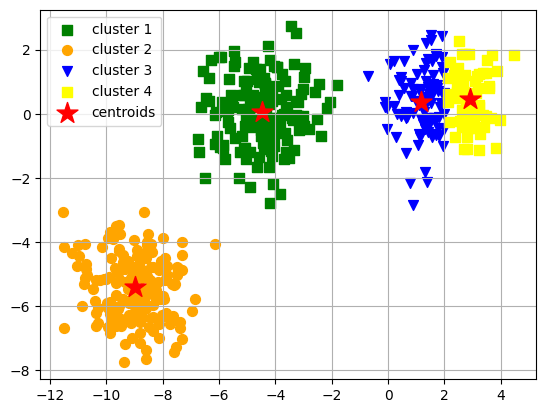

In [93]:
#let's see a bad clustering in two dimensions
km = KMeans(n_clusters=4, init ='k-means++',n_init=10,max_iter=300,random_state=0)
y_km = km.fit_predict(X)

print("Distortion: %.2f" % km.inertia_)

plt.scatter(X.iloc[y_km==0,0],X.iloc[y_km==0,1],s=50,c='green',marker='s',label='cluster 1')
plt.scatter(X.iloc[y_km==1,0],X.iloc[y_km==1,1],s=50,c='orange',marker='o',label='cluster 2')
plt.scatter(X.iloc[y_km==2,0],X.iloc[y_km==2,1],s=50,c='blue',marker='v',label='cluster 3')
plt.scatter(X.iloc[y_km==3,0],X.iloc[y_km==3,1],s=50,c='yellow',marker='s',label='cluster 4')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,c='red',marker='*',label='centroids')
plt.legend()
plt.grid()
plt.show()

In [94]:
#silhouettes analysis
km = KMeans(n_clusters=3, init ='k-means++',n_init=10,max_iter=300,random_state=0)
y_km = km.fit_predict(X)

import numpy as np
cluster_labels = np.unique(y_km)

In [95]:
cluster_labels

array([0, 1, 2])

In [96]:
n_clusters = cluster_labels.shape[0]
n_clusters

3

In [97]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_vals = silhouette_samples(X,
                                     y_km,
                                     metric='euclidean')

The Silhouette Coefficient is calculated using the mean intra-cluster distance $u_i$ and the mean nearest-cluster distance $v_i$ for each sample. 

The Silhouette Coefficient for a sample is $$(v_i - u_i) / max(u_i, v_i)$$


The Silhouette Coefficient is a measure of how well samples are clustered with samples that are similar to themselves. 
Clustering models with a high Silhouette Coefficient are said to be dense, where samples in the same cluster are similar to each other, and well separated, where samples in different clusters are not very similar to each other.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.


In [98]:
silhouette_vals
len(silhouette_vals)

500

In [99]:
silhouette_vals[y_km==2]

array([0.78543063, 0.67110911, 0.70748835, 0.80158206, 0.74570072,
       0.79285515, 0.75418344, 0.79165531, 0.625326  , 0.7391657 ,
       0.49563405, 0.76614439, 0.8009136 , 0.71932182, 0.6877942 ,
       0.77409017, 0.75763424, 0.8072074 , 0.73888483, 0.62740712,
       0.77096368, 0.79078632, 0.76222453, 0.77207485, 0.78168453,
       0.73255917, 0.7796377 , 0.79318017, 0.4851087 , 0.6238025 ,
       0.69853549, 0.77927125, 0.76432883, 0.81253047, 0.77231945,
       0.76243061, 0.75669609, 0.76929733, 0.78526235, 0.65778412,
       0.58781694, 0.75087307, 0.80017529, 0.72105084, 0.62825399,
       0.79447825, 0.70479019, 0.81231629, 0.79975176, 0.79197778,
       0.76202032, 0.61534325, 0.64190823, 0.73479461, 0.80433477,
       0.78369382, 0.69346004, 0.48455085, 0.74329035, 0.74342731,
       0.78208487, 0.42402804, 0.80360737, 0.71398882, 0.67343475,
       0.78881461, 0.75825778, 0.56206633, 0.5070501 , 0.66067071,
       0.78094672, 0.77953012, 0.70807742, 0.72360687, 0.75808

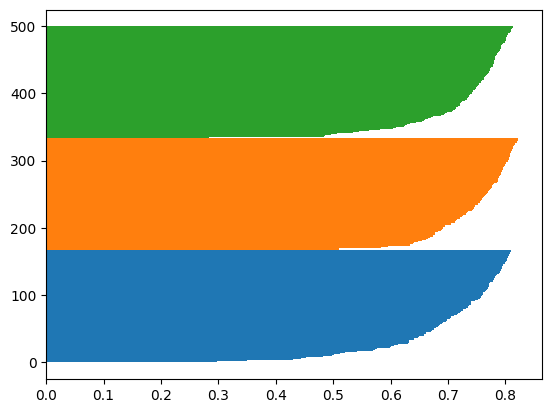

In [100]:
y_ax_lower, y_ax_upper=0,0

for i in cluster_labels: #for each cluster do:
    c_silhouette_vals = silhouette_vals[y_km==i]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1) #Make a horizontal bar plot.
    #The bars are positioned at y with the given alignment. Their dimensions are given by width and height. 
    y_ax_lower += len(c_silhouette_vals)

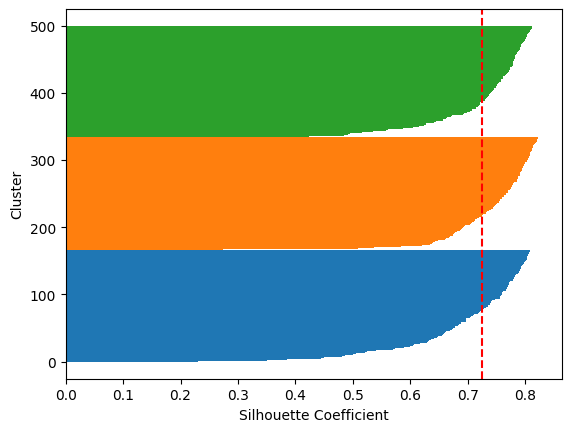

In [101]:
def silh(silhouette_val,y): 
    y_ax_lower, y_ax_upper=0,0

    for i in np.unique(y):
        c_silhouette_vals = silhouette_vals[y_km==i]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1)
        y_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color='red',linestyle='--')
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette Coefficient')
    plt.show()
    
silh(silhouette_vals,y_km)

For n_clusters = 2 The average silhouette_score is : 0.6274472426807147


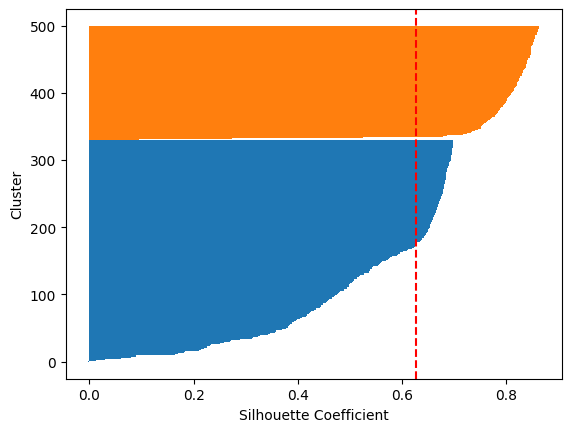

For n_clusters = 4 The average silhouette_score is : 0.5957917394159186


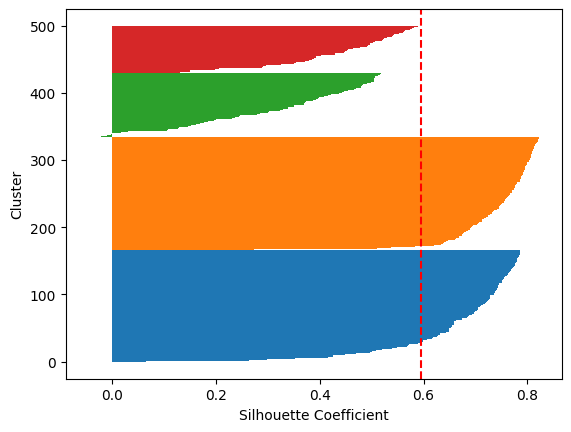

For n_clusters = 5 The average silhouette_score is : 0.4497726134330416


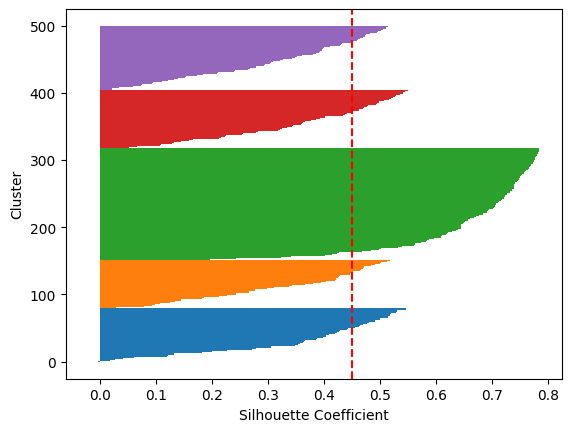

For n_clusters = 6 The average silhouette_score is : 0.3323334334684166


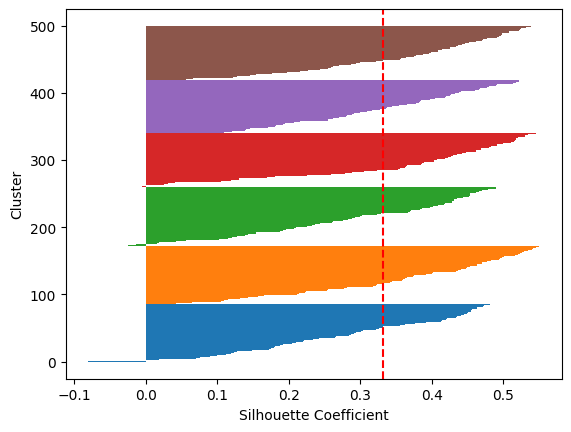

In [102]:
range_n_clusters = [2, 4, 5, 6]

for n_clusters in range_n_clusters:  
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    km = KMeans(n_clusters=n_clusters, init ='k-means++',n_init=10,max_iter=300,random_state=0)
    y_km = km.fit_predict(X)
    
    cluster_labels = np.unique(y_km)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, y_km)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')
    
    silh(silhouette_vals,y_km)

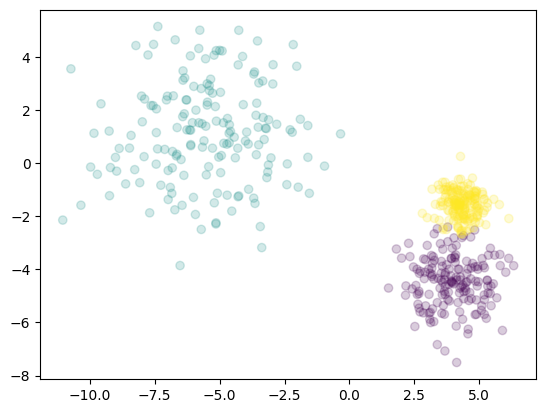

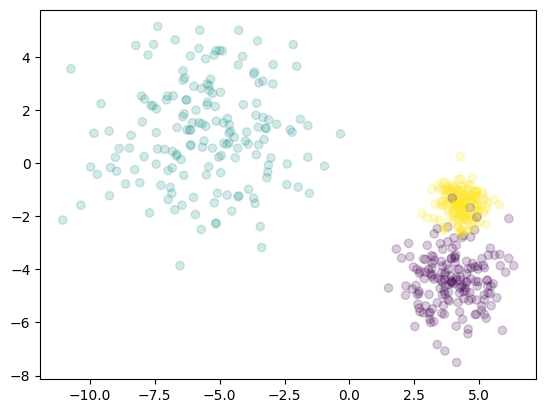

In [103]:
from sklearn.cluster import KMeans

#min-max scaler: transforms features by scaling each feature to a given range.
km = KMeans(n_clusters=3, 
            init='random',  #init=’k-means++’ 
            n_init=10, 
            max_iter=300, 
            tol=1e-04, 
            random_state=0) #init=’k-means++’ see notes below

km.fit(X2) #Compute k-means clustering.
y_km = km.predict(X2) #Predict the closest cluster each sample in X belongs to.

plt.scatter(X2[0],X2[1],c=y_km, alpha=.2)
plt.show()

plt.scatter(X2[0],X2[1],c=X2[2],alpha=.2)
plt.show()

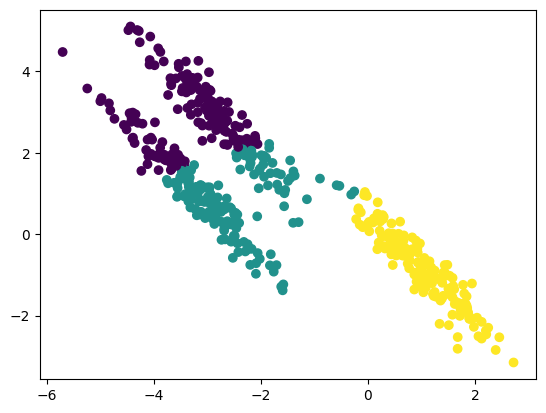

In [104]:
from sklearn.cluster import KMeans

#min-max scaler: transforms features by scaling each feature to a given range.
km = KMeans(n_clusters=3, 
            init='random',  #init=’k-means++’ 
            n_init=10, 
            max_iter=300, 
            tol=1e-04, 
            random_state=0) #init=’k-means++’ see notes below

km.fit(X3) #Compute k-means clustering.
y_km = km.predict(X3) #Predict the closest cluster each sample in X belongs to.

plt.scatter(X3[0],X3[1],c=y_km)
plt.show()

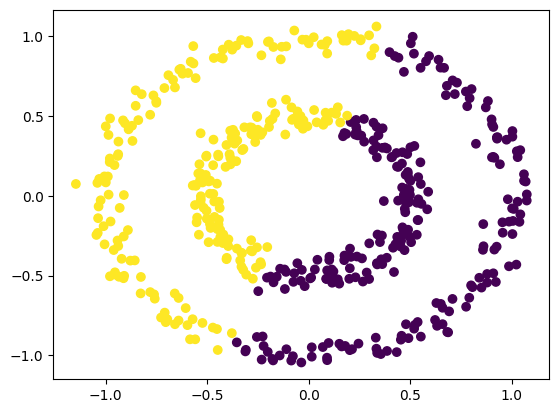

In [105]:
from sklearn.cluster import KMeans

#min-max scaler: transforms features by scaling each feature to a given range.
km = KMeans(n_clusters=2, 
            init='random',  #init=’k-means++’ 
            n_init=10, 
            max_iter=300, 
            tol=1e-04, 
            random_state=0) #init=’k-means++’ see notes below

km.fit(X4) #Compute k-means clustering.
y_km = km.predict(X4) #Predict the closest cluster each sample in X belongs to.

plt.scatter(X4[0],X4[1],c=y_km)
plt.show()



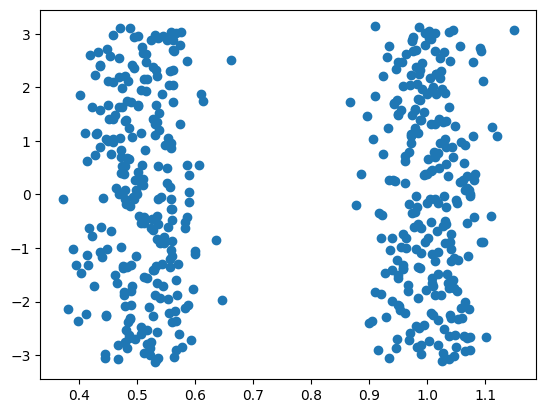

In [106]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

rho,phi=cart2pol(X4[0],X4[1])

X4_polar=np.array(list(zip(rho,phi)))

plt.scatter(X4_polar[:,0],X4_polar[:,1])



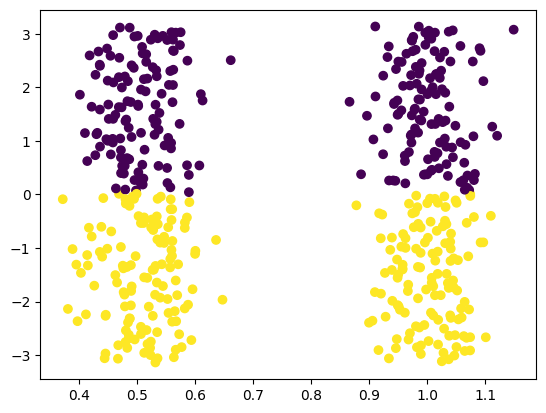

In [107]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=1000, 
            max_iter=300, 
            tol=1e-04, 
            random_state=0) #init=’k-means++’ see notes below

km.fit(X4_polar) #Compute k-means clustering.
y_km = km.predict(X4_polar) #Predict the closest cluster each sample in X belongs to.

plt.scatter(X4_polar[:,0],X4_polar[:,1],c=y_km)
plt.show()


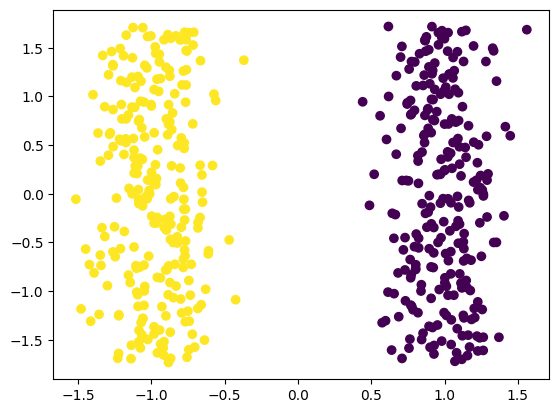

In [108]:
from sklearn import preprocessing

X4_polar_scaled = preprocessing.scale(X4_polar)

km.fit(X4_polar_scaled) #Compute k-means clustering.
y_km = km.predict(X4_polar_scaled) #Predict the closest cluster each sample in X belongs to.

plt.scatter(X4_polar_scaled[:,0],X4_polar_scaled[:,1],c=y_km)
plt.show()


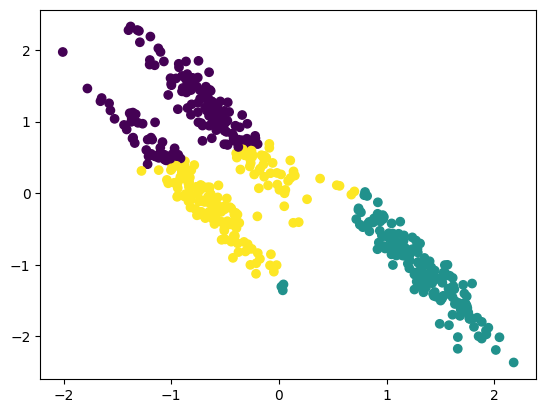

In [109]:
from sklearn import preprocessing

X3_scaled = preprocessing.scale(X3)


km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=50, 
            max_iter=300, 
            tol=1e-04, 
            random_state=0) 

km.fit(X3_scaled) #Compute k-means clustering.
y_km = km.predict(X3_scaled) #Predict the closest cluster each sample in X belongs to.

plt.scatter(X3_scaled[:,0],X3_scaled[:,1],c=y_km)
plt.show()